# TASK 2 : Prediction using Unsupervised ML

## #GRIPJAN21

### SHIVAM GUPTA 

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION

#### Problem: From the given Iris dataset, predict the optimum number of clusters and represent it visually.


Data source: https://bit.ly/3kXTdox

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
#read data
df=pd.read_csv(r"C:\Users\SHIVAM GUPTA\Downloads\Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Drop the extra ID column
df.drop('Id',axis=1,inplace=True)

In [9]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [11]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df.shape

(150, 5)

In [13]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
df.size

750

In [15]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking null values 

In [17]:
df.isnull == True

False

In [18]:
#find pairwise correlation of columns
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Visualization of dataset 

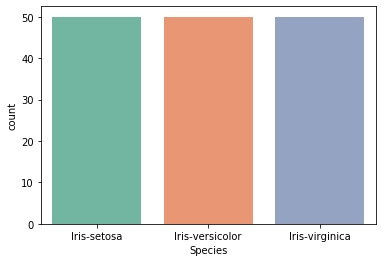

In [53]:
sns.countplot(x=df["Species"],data=df,palette='Set2')

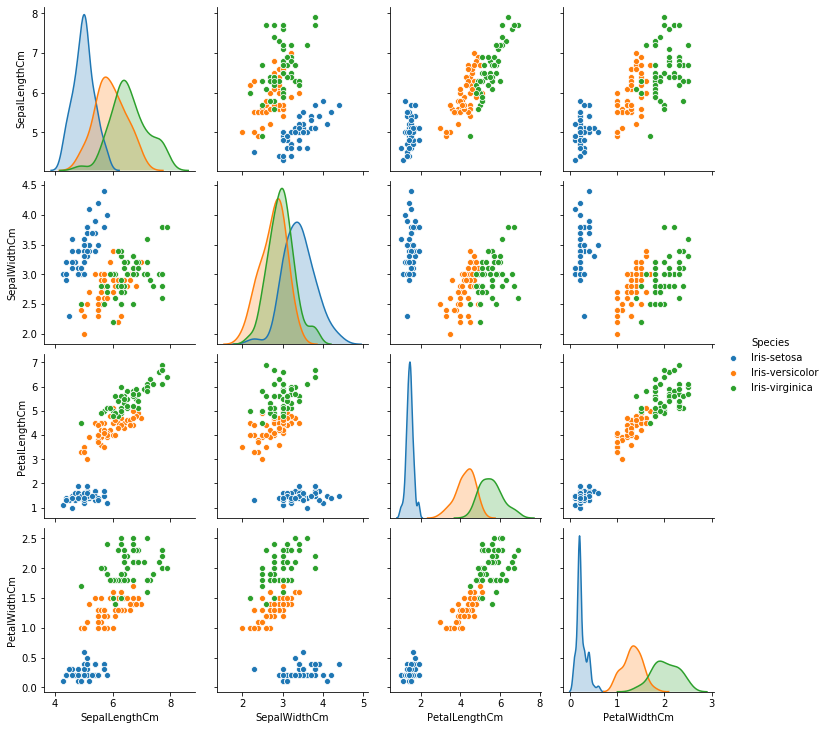

In [52]:
sns.pairplot(df,hue='Species')

In [5]:
x_data=df.iloc[:,[0,1,2,3]].values

In [61]:
x_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Elbow Method to find the optimum number of clusters for k-means classification.

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []    #within clusters sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(x_data)
    wcss.append(kmeans.inertia_)

In [21]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

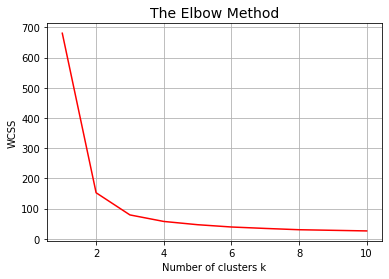

In [7]:
#ploting the results on a graph
plt.plot(range(1, 11), wcss, 'r')
plt.title('The Elbow Method', fontsize=14)
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.grid()    #plt.show()

#### From the above graph,k = 3 is elbow ,so the number of clusters is 3.

In [8]:
#Creating the K-means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x_data)

In [9]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [27]:
#KModel=kmeans.fit(x_data)
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [16]:
df['cluster']=y_means
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [17]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0
149,5.9,3.0,5.1,1.8,Iris-virginica,2


## Final Visual Representation

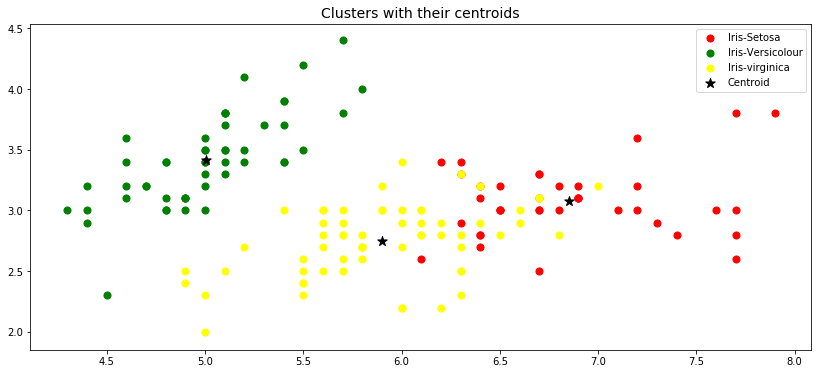

In [31]:
#Visualizing the clusters

plt.figure(figsize=(14,6))
plt.title('Clusters with their centroids',fontsize=14)
plt.scatter(x_data[y_means == 0,0],x_data[y_means == 0,1],s=50,c='red',label='Iris-Setosa')
plt.scatter(x_data[y_means == 1,0],x_data[y_means == 1,1],s=50,c='green',label='Iris-Versicolour')
plt.scatter(x_data[y_means == 2,0],x_data[y_means == 2,1],s=50,c='yellow',label='Iris-virginica')

#plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color='black',marker='*',label='Centroid')
plt.legend()

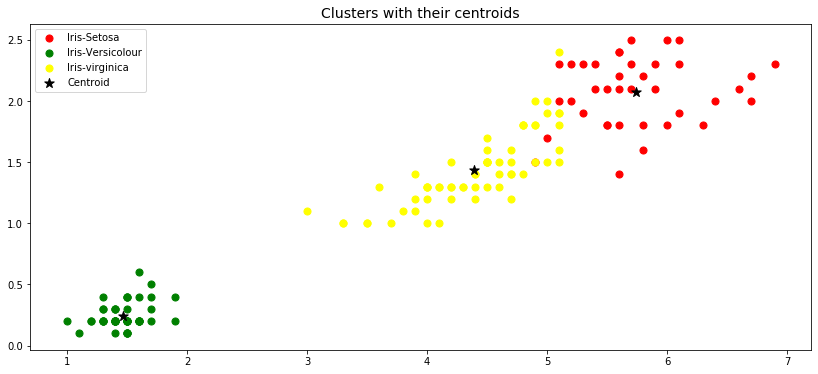

In [9]:
#Visualizing the clusters

plt.figure(figsize=(14,6))
plt.title('Clusters with their centroids',fontsize=14)
plt.scatter(x_data[y_means == 0,2],x_data[y_means == 0,3],s=50,c='red',label='Iris-Setosa')
plt.scatter(x_data[y_means == 1,2],x_data[y_means == 1,3],s=50,c='green',label='Iris-Versicolour')
plt.scatter(x_data[y_means == 2,2],x_data[y_means == 2,3],s=50,c='yellow',label='Iris-virginica')

#plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,color='black',marker='*',label='Centroid')
plt.legend()

# THANK YOU